Задача 1. Реализация подсчёта треугольников

In [ ]:
!sudo add-apt-repository ppa:graphblas/graphblas
!sudo apt-get update
!sudo apt-get install libgraphblas1


ERROR: ppa 'graphblas/graphblas' not found (use --login if private)
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,374 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main am

In [ ]:
!pip install python-graphblas[default]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.9/350.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 MB 16.8 MB/s eta 0:00:00


## Задание 1

Используя python-graphblas реализовать наивный алгоритм, для матрицы смежности вычисляющий и возвращающий количество треугольников неориентированного графа.
- Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
- Функция возвращает число --- количество треугольников в графе.

In [ ]:
import graphblas as gb
import numpy as np
from graphblas import monoid, dtypes, Matrix, binary, semiring


def naiveA3(A):
      # Удостоверимся, что матрица A неориентированная и целочисленная
    if not A.isequal(A.T, check_dtype=True):
        raise ValueError("Матрица должна быть симметричной и целочисленной")

    # Возводим матрицу смежности в куб, умножением матрицы на себя три раза
    A_cubed = A.mxm(A.mxm(A))

    # Извлекаем диагональные элементы куба матрицы
    diagonal = A_cubed.diag()

    # Суммируем все диагональные элементы, так как каждый путь длиной три, заканчивающийся в вершине, учитывает один треугольник
    triangle_count = diagonal.reduce(gb.agg.sum).value or 0

    # Делим на 6, поскольку каждый треугольник подсчитывается шесть раз
    return int(triangle_count / 6)

Проверка №1

In [ ]:
rows = [0, 1, 1, 2, 2, 0]
cols = [1, 2, 0, 0, 1, 2]
values = [1, 1, 1, 1, 1, 1]
A = gb.Matrix.from_coo(rows, cols, values, nrows=3, ncols=3, dtype=dtypes.INT64)


print('Количество треугольников', naiveA3(A))


Количество треугольников 1


In [ ]:
adjacency_matrix = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников', naiveA3(A))


Количество треугольников 2


In [ ]:
adjacency_matrix = np.array([
 [0, 1, 1],
 [1, 0, 1],
 [1, 1, 0]
])

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников', naiveA3(A))


Количество треугольников 1


In [ ]:
# должно быть 4
adjacency_matrix = np.array([
    [0, 1, 1, 0, 0, 0],  # вершина 0
    [1, 0, 1, 1, 0, 0],  # вершина 1
    [1, 1, 0, 1, 1, 0],  # вершина 2
    [0, 1, 1, 0, 1, 1],  # вершина 3
    [0, 0, 1, 1, 0, 1],  # вершина 4
    [0, 0, 0, 1, 1, 0]   # вершина 5
], dtype=int)

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников', naiveA3(A))


Количество треугольников 4


In [ ]:
# должно быть 0
adjacency_matrix = np.array([
    [0, 1, 0, 0, 0, 0],  # вершина 0
    [1, 0, 0, 0, 0, 0],  # вершина 1
    [0, 0, 0, 1, 0, 0],  # вершина 2
    [0, 0, 1, 0, 0, 0],  # вершина 3
    [0, 0, 0, 0, 0, 1],  # вершина 4
    [0, 0, 0, 0, 1, 0]   # вершина 5
], dtype=int)

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)
print('Количество треугольников', naiveA3(A))


Количество треугольников 0


## Задание №2

Используя python-graphblas реализовать наивный алгоритм с маской, для матрицы смежности A , вычисляющий A^2 и возвращающий количество треугольников неориентированного графа.
- Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
- Функция возвращает число --- количество треугольников в графе.

In [ ]:
import graphblas as gb
from graphblas import monoid, binary, semiring

def NaiveA2(A):
    if not A.isequal(A.T, check_dtype=True):
        raise ValueError("Матрица должна быть симметричной и целочисленной")
    #возводим в квадрат матрицу смежности
    A2=A.mxm(A)
    #"просеиваю" квадрат матрицы смежности через маску
    triA=A2.dup(mask=A.dup(dtype=dtypes.BOOL))
    #получаем результат путем вычисления суммы построчных сумм элементов матрицы
    cnt_triangle=(triA.reduce_scalar(gb.monoid.plus).value or 0)
    return int(cnt_triangle/6)

Проверка №2

In [ ]:
rows = [0, 1, 1, 2, 2, 0]
cols = [1, 2, 0, 0, 1, 2]
values = [1, 1, 1, 1, 1, 1]
A = gb.Matrix.from_coo(rows, cols, values, nrows=3, ncols=3, dtype=dtypes.INT64)


print('Количество треугольников', NaiveA2(A))


Количество треугольников 1


In [ ]:
adjacency_matrix = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников', NaiveA2(A))

Количество треугольников 2


In [ ]:
adjacency_matrix = np.array([
 [0, 1, 1],
 [1, 0, 1],
 [1, 1, 0]
])

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников', NaiveA2(A))


Количество треугольников 1


In [ ]:
# должно быть 4
adjacency_matrix = np.array([
    [0, 1, 1, 0, 0, 0],  # вершина 0
    [1, 0, 1, 1, 0, 0],  # вершина 1
    [1, 1, 0, 1, 1, 0],  # вершина 2
    [0, 1, 1, 0, 1, 1],  # вершина 3
    [0, 0, 1, 1, 0, 1],  # вершина 4
    [0, 0, 0, 1, 1, 0]   # вершина 5
], dtype=int)

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников', NaiveA2(A))

Количество треугольников 4


In [ ]:
# должно быть 0
adjacency_matrix = np.array([
    [0, 1, 0, 0, 0, 0],  # вершина 0
    [1, 0, 0, 0, 0, 0],  # вершина 1
    [0, 0, 0, 1, 0, 0],  # вершина 2
    [0, 0, 1, 0, 0, 0],  # вершина 3
    [0, 0, 0, 0, 0, 1],  # вершина 4
    [0, 0, 0, 0, 1, 0]   # вершина 5
], dtype=int)

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)
print('Количество треугольников', NaiveA2(A))

Количество треугольников 0


## Задание №3

Используя python-graphblas реализовать Сohen's algorithm, вычисляющий количество треугольников неориентированного графа.
- Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
- Функция возвращает число --- количество треугольников в графе.

In [ ]:
import graphblas as gb
from graphblas import monoid, binary, semiring, Matrix, dtypes

def cohen(A):
    # Проверка, что матрица A неориентированная и целочисленная
    if not A.isequal(A.T, check_dtype=True):
        raise ValueError("Матрица должна быть симметричной и целочисленной")
    # Используем функцию select.tril для получения нижнего треугольника матрицы A
    lower_triangle = gb.select.tril(A)
    # Используем функцию select.triu для получения верхнего треугольника матрицы A
    upper_triangle = gb.select.triu(A)
    # Перемножаем нижний и верхний треугольники. Это дает матрицу, где ненулевые элементы соответствуют возможным треугольникам
    product = lower_triangle.mxm(upper_triangle)
    # Применяем маску из исходной матрицы A для фильтрации ненужных элементов, оставляя только те, которые соответствуют наличию реальных треугольников
    masked_product = product.dup(mask=A.dup(dtype=dtypes.BOOL))
    # Суммируем все элементы отфильтрованной матрицы, каждый треугольник учитывается дважды
    triangle_count = masked_product.reduce_scalar(gb.monoid.plus).value or 0
    # Делим на 2, так как каждый треугольник подсчитывается два раза
    return int(triangle_count / 2)

Проверка №3

In [ ]:
rows = [0, 1, 1, 2, 2, 0]
cols = [1, 2, 0, 0, 1, 2]
values = [1, 1, 1, 1, 1, 1]
A = gb.Matrix.from_coo(rows, cols, values, nrows=3, ncols=3, dtype=dtypes.INT64)


print('Количество треугольников', cohen(A))


Количество треугольников 1


In [ ]:
adjacency_matrix = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников', cohen(A))

Количество треугольников 2


In [ ]:
adjacency_matrix = np.array([
 [0, 1, 1],
 [1, 0, 1],
 [1, 1, 0]
])

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников', cohen(A))


Количество треугольников 1


In [ ]:
# должно быть 4
adjacency_matrix = np.array([
    [0, 1, 1, 0, 0, 0],  # вершина 0
    [1, 0, 1, 1, 0, 0],  # вершина 1
    [1, 1, 0, 1, 1, 0],  # вершина 2
    [0, 1, 1, 0, 1, 1],  # вершина 3
    [0, 0, 1, 1, 0, 1],  # вершина 4
    [0, 0, 0, 1, 1, 0]   # вершина 5
], dtype=int)

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников', cohen(A))

Количество треугольников 4


In [ ]:
# должно быть 0
adjacency_matrix = np.array([
    [0, 1, 0, 0, 0, 0],  # вершина 0
    [1, 0, 0, 0, 0, 0],  # вершина 1
    [0, 0, 0, 1, 0, 0],  # вершина 2
    [0, 0, 1, 0, 0, 0],  # вершина 3
    [0, 0, 0, 0, 0, 1],  # вершина 4
    [0, 0, 0, 0, 1, 0]   # вершина 5
], dtype=int)

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)
print('Количество треугольников', cohen(A))

Количество треугольников 0


# Задание №4

Используя python-graphblas реализовать Sandia algorithm, вычисляющий количество треугольников неориентированного графа.
- Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
- Функция возвращает число --- количество треугольников в графе.

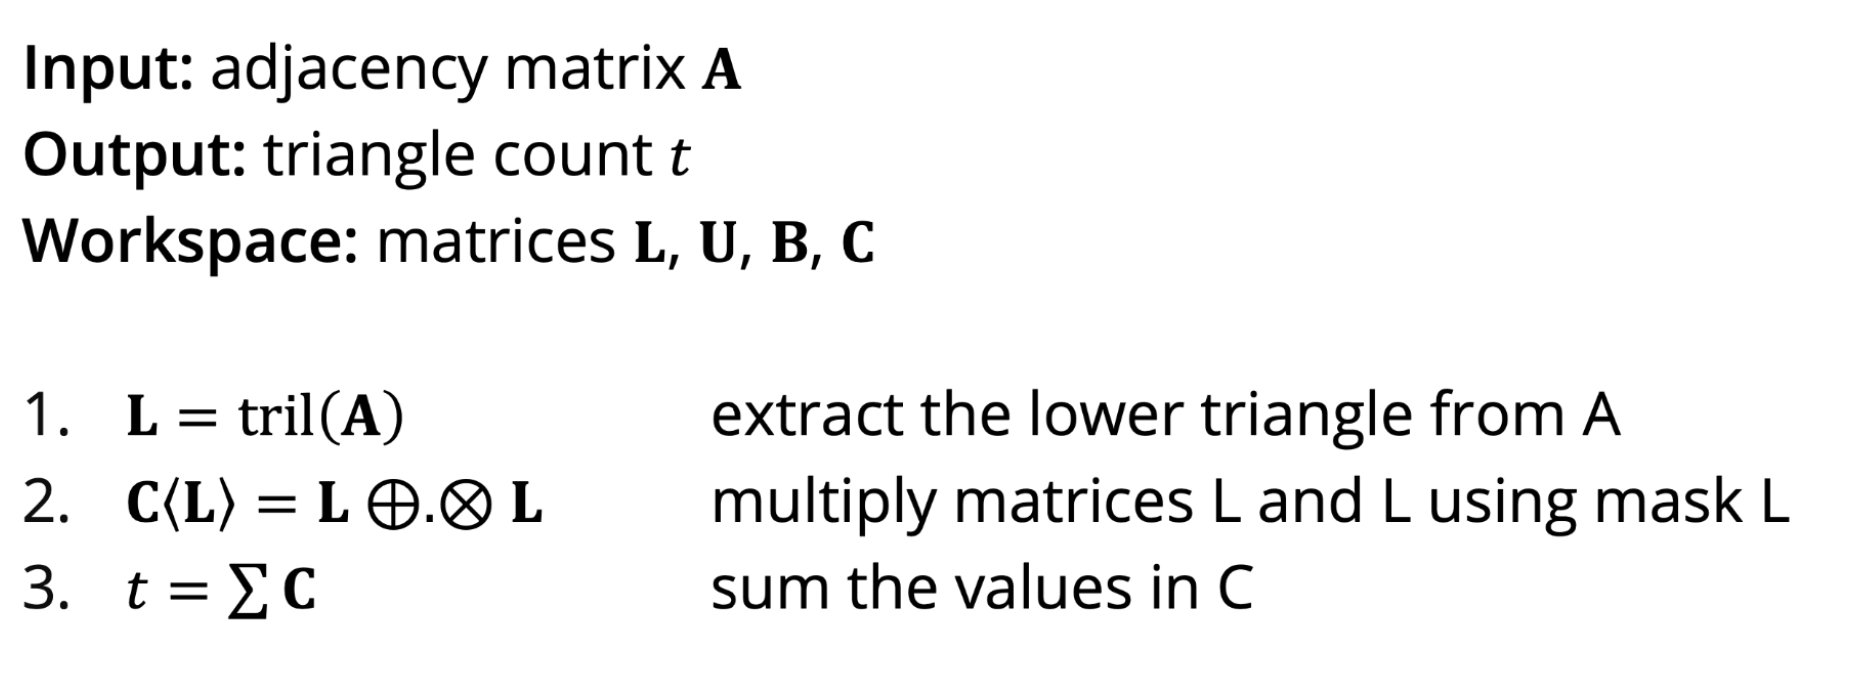

In [ ]:
def sandia(A):
    # Проверка, что матрица A симметричная и отражает неориентированный граф
    if not A.isequal(A.T, check_dtype=True):
        raise ValueError("Матрица должна быть симметричной и целочисленной")

    # Достаем нижний треугольник из A
    L = gb.select.tril(A)
    # Умножажем L@L
    L_squared = L.mxm(L)
    # создаем маску на матрице L
    mask = L.dup(dtype=dtypes.BOOL)
    # Применяем маску на L@L
    masked_product = L_squared.dup(mask=mask)
    # Sum all elements to count triangles, ensuring a default of 0 if the result is None
    triangle_count = masked_product.reduce_scalar(gb.monoid.plus).value or 0

    return int(triangle_count)

Проверка №4

In [ ]:
rows = [0, 1, 1, 2, 2, 0]
cols = [1, 2, 0, 0, 1, 2]
values = [1, 1, 1, 1, 1, 1]
A = gb.Matrix.from_coo(rows, cols, values, nrows=3, ncols=3, dtype=dtypes.INT64)


print('Количество треугольников', sandia(A))


Количество треугольников 1


In [ ]:
adjacency_matrix = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников', sandia(A))

Количество треугольников 2


In [ ]:
adjacency_matrix = np.array([
 [0, 1, 1],
 [1, 0, 1],
 [1, 1, 0]
])

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников', sandia(A))

Количество треугольников 1


In [ ]:
# должно быть 0
adjacency_matrix = np.array([
    [0, 1, 1, 0, 0, 0],  # вершина 0
    [1, 0, 1, 1, 0, 0],  # вершина 1
    [1, 1, 0, 1, 1, 0],  # вершина 2
    [0, 1, 1, 0, 1, 1],  # вершина 3
    [0, 0, 1, 1, 0, 1],  # вершина 4
    [0, 0, 0, 1, 1, 0]   # вершина 5
], dtype=int)

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников', sandia(A))

Количество треугольников 4


In [ ]:
# должно быть 0
adjacency_matrix = np.array([
    [0, 1, 0, 0, 0, 0],  # вершина 0
    [1, 0, 0, 0, 0, 0],  # вершина 1
    [0, 0, 0, 1, 0, 0],  # вершина 2
    [0, 0, 1, 0, 0, 0],  # вершина 3
    [0, 0, 0, 0, 0, 1],  # вершина 4
    [0, 0, 0, 0, 1, 0]   # вершина 5
], dtype=int)

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)
print('Количество треугольников', sandia(A))

Количество треугольников 0


## Задание 5 (+2)

+2 балла Используя python-graphblas реализовать функцию, вычисляющую для каждой вершины неориентированного графа количество треугольников, в которых она участвует.
- Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
- Функция возвращает массив, где для каждой вершины указано, в скольки треугольниках она участвует.

In [ ]:
import graphblas as gb
from graphblas import dtypes

def count_vertex_triangles(A):
    # Проверка, что матрица A симметричная и отражает неориентированный граф
    if not A.isequal(A.T, check_dtype=True):
        raise ValueError("Матрица должна быть симметричной и целочисленной")

    A_squared = A @ A
    A_cubed = A_squared @ A
    diagonal = A_cubed.diag()
    diagonal << diagonal.apply(gb.binary.truediv, right=2)
    triangle_counts = diagonal.to_dense()
    return triangle_counts.tolist()

In [ ]:
# количество треугольнов 1
rows = [0, 1, 1, 2, 2, 0]
cols = [1, 2, 0, 0, 1, 2]
values = [1, 1, 1, 1, 1, 1]
A = gb.Matrix.from_coo(rows, cols, values, nrows=3, ncols=3, dtype=dtypes.INT64)


print(A)
print('Количество треугольников на вершину:', count_vertex_triangles(A))



"M_132"    nvals  nrows  ncols  dtype         format
gb.Matrix      6      3      3  INT64  bitmapr (iso)
----------------------------------------------------
   0  1  2
0     1  1
1  1     1
2  1  1   
Количество треугольников на вершину: [1, 1, 1]


In [ ]:
# количество треугольнов 2

adjacency_matrix = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print(A)
print('Количество треугольников на вершину:', count_vertex_triangles(A))


"M_147"    nvals  nrows  ncols  dtype  format
gb.Matrix     16      4      4  INT64   fullr
---------------------------------------------
   0  1  2  3
0  0  1  1  0
1  1  0  1  1
2  1  1  0  1
3  0  1  1  0
Количество треугольников на вершину: [1, 2, 2, 1]


In [ ]:
# количество треугольнов 1

adjacency_matrix = np.array([
 [0, 1, 1],
 [1, 0, 1],
 [1, 1, 0]
])

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print(A)
print('Количество треугольников на вершину:', count_vertex_triangles(A))


"M_144"    nvals  nrows  ncols  dtype  format
gb.Matrix      9      3      3  INT64   fullr
---------------------------------------------
   0  1  2
0  0  1  1
1  1  0  1
2  1  1  0
Количество треугольников на вершину: [1, 1, 1]


In [ ]:
adjacency_matrix = np.array([
    [0, 1, 1, 0, 0, 0],  # вершина 0
    [1, 0, 1, 1, 0, 0],  # вершина 1
    [1, 1, 0, 1, 1, 0],  # вершина 2
    [0, 1, 1, 0, 1, 1],  # вершина 3
    [0, 0, 1, 1, 0, 1],  # вершина 4
    [0, 0, 0, 1, 1, 0]   # вершина 5
], dtype=int)

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников на вершину:', count_vertex_triangles(A))

Количество треугольников на вершину: [1, 2, 3, 3, 2, 1]


In [ ]:
# должно быть 0
adjacency_matrix = np.array([
    [0, 1, 0, 0, 0, 0],  # вершина 0
    [1, 0, 0, 0, 0, 0],  # вершина 1
    [0, 0, 0, 1, 0, 0],  # вершина 2
    [0, 0, 1, 0, 0, 0],  # вершина 3
    [0, 0, 0, 0, 0, 1],  # вершина 4
    [0, 0, 0, 0, 1, 0]   # вершина 5
], dtype=int)

A = Matrix.from_dense(adjacency_matrix, dtype=dtypes.INT64)

print('Количество треугольников на вершину:', count_vertex_triangles(A))

Количество треугольников на вершину: [0, 0, 0, 0, 0, 0]


## Задание 6 (+2)

 Скачать 10 графов в формате Matrix Market с сайта SuiteSparse Matrix Collection и оценить время работы всех полученных реализаций. Сделать выводы.
 - В качестве фильтров для поиска графов на сайте использовать следующие значения: Rutherford-Boeing Type = Binary, Special Structure = Symmetric, Nonzeros.Min = 10000.

In [ ]:
from graphblas.io import mmread

In [ ]:
def test(A):
    result = [naiveA3(A), NaiveA2(A), cohen(A), sandia(A)]
    print(result)
    if not all(element == element for element in result):
       print("All return values are not equal")
    else:
        %timeit naiveA3(A)
        %timeit NaiveA2(A)
        %timeit cohen(A)
        %timeit sandia(A)
        #%timeit count_vertex_triangles(A)

**№1**

In [ ]:
M1 = mmread('G1.mtx')
M1

"M_6223"   nvals  nrows  ncols  dtype     format
gb.Matrix  38352    800    800   FP64  csr (iso)
------------------------------------------------
    0    1   2   3   4    5    6    7   8   9    ...  790 791  792  793  794  \
0                                                ...                           
1                                                ...                           
2                              1.0               ...  1.0                      
3                                                ...                           
4                              1.0               ...                           
..   ..  ...  ..  ..  ..  ...  ...  ...  ..  ..  ...  ...  ..  ...  ...  ...   
795                                              ...                           
796                                              ...                           
797                                 1.0          ...           1.0  1.0  1.0   
798                                              ...                           
799      1.0              1.0                    ...                           

    795 796 797 798  799  
0                         
1                    1.0  
2                         
3                         
4                         
..   ..  ..  ..  ..  ...  
795                       
796                       
797                       
798                       
799

In [ ]:
test(M1)


[18093, 18093, 18093, 18093]
152 ms ± 48.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
12.6 ms ± 6.85 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.45 ms ± 217 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 5.09 times longer than the fastest. This could mean that an intermediate result is being cached.
9.48 ms ± 5.3 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


**№2**

In [ ]:
M2 = mmread('G22.mtx')
M2

"M_13696"  nvals  nrows  ncols  dtype     format
gb.Matrix  39980   2000   2000   FP64  csr (iso)
------------------------------------------------
     row   col  val
0      0   106  1.0
1      0   206  1.0
2      0   247  1.0
3      0   414  1.0
4      0   695  1.0
5      0   792  1.0
6      0   896  1.0
7      0   944  1.0
8      0  1001  1.0
9      0  1130  1.0
...  ...   ...  ...

In [ ]:
test(M2)

[1395, 1395, 1395, 1395]
567 ms ± 67.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
29.8 ms ± 8.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 6.58 times longer than the fastest. This could mean that an intermediate result is being cached.
7.81 ms ± 7.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
33.1 ms ± 9.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**#2**

In [ ]:
M3 = mmread('G4.mtx')
M3

"M_14453"  nvals  nrows  ncols  dtype     format
gb.Matrix  38352    800    800   FP64  csr (iso)
------------------------------------------------
     0    1    2    3    4    5   6    7    8   9    ...  790  791 792  793  \
0                   1.0                              ...                      
1                        1.0           1.0           ...                      
2                                                    ...                      
3    1.0                                             ...                1.0   
4         1.0                 1.0                    ...                1.0   
..   ...  ...  ...  ...  ...  ...  ..  ...  ...  ..  ...  ...  ...  ..  ...   
795                                                  ...       1.0            
796                                                  ...                      
797                                         1.0      ...  1.0                 
798            1.0                                   ...                      
799                                                  ...                      

     794 795 796 797  798 799  
0                              
1                              
2                     1.0      
3                              
4                              
..   ...  ..  ..  ..  ...  ..  
795                            
796                            
797  1.0                       
798                            
799

In [ ]:
test(M3)

[18096, 18096, 18096, 18096]
313 ms ± 32.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 4.01 times longer than the fastest. This could mean that an intermediate result is being cached.
27.8 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 4.81 times longer than the fastest. This could mean that an intermediate result is being cached.
9.17 ms ± 6.97 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.44 ms ± 90.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**#4**

In [ ]:
M4 = mmread('G50.mtx')
M4

"M_20320"  nvals  nrows  ncols  dtype     format
gb.Matrix  12000   3000   3000   FP64  csr (iso)
------------------------------------------------
     0    1    2    3    4    5    6    7    8    9     ... 2990 2991 2992  \
0          1.0                                          ...                  
1     1.0       1.0                                     ...                  
2          1.0       1.0                                ...                  
3               1.0       1.0                           ...                  
4                    1.0       1.0                      ...                  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2995                                                    ...                  
2996                                                    ...                  
2997                                                    ...                  
2998                                                    ...                  
2999                                                    ...                  

     2993 2994 2995 2996 2997 2998 2999  
0                                        
1                                        
2                                        
3                                        
4                                        
...   ...  ...  ...  ...  ...  ...  ...  
2995       1.0       1.0                 
2996            1.0       1.0            
2997                 1.0       1.0       
2998                      1.0       1.0  
2999                           1.0

In [ ]:
test(M4)

[0, 0, 0, 0]
5 ms ± 949 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.13 ms ± 338 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.2 ms ± 232 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
858 µs ± 81.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**#5**

У графа была пометка Structural ploblems

In [ ]:
M5  = mmread('barth.mtx')
M5

"M_94953"  nvals  nrows  ncols  dtype     format
gb.Matrix  46187   6691   6691   FP64  csr (iso)
------------------------------------------------
     0    1    2    3    4    5    6    7    8    9     ... 6681 6682 6683  \
0     1.0                                               ...                  
1          1.0       1.0                 1.0            ...                  
2               1.0                                     ...                  
3          1.0       1.0                                ...                  
4                         1.0                           ...                  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6686                                                    ...                  
6687                                                    ...                  
6688                                                    ...                  
6689                                                    ...                  
6690                                                    ...                  

     6684 6685 6686 6687 6688 6689 6690  
0                                        
1                                        
2                                        
3                                        
4                                        
...   ...  ...  ...  ...  ...  ...  ...  
6686            1.0                      
6687                 1.0                 
6688                      1.0            
6689                           1.0       
6690                                1.0

In [ ]:
test(M5)

[33961, 33961, 46065, 59285]
84.5 ms ± 21.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
10.7 ms ± 6.53 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
6 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.5 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


**#6**

In [ ]:
M6 = mmread('Erdos02.mtx')
M6

"M_102426"  nvals  nrows  ncols  dtype     format
gb.Matrix   16944   6927   6927   FP64  csr (iso)
-------------------------------------------------
     0    1    2    3    4    5    6    7    8    9     ... 6917 6918 6919  \
0                                                       ...                  
1                                                       ...                  
2                                                       ...                  
3                                                       ...                  
4                                                       ...                  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6922                                               1.0  ...                  
6923                                                    ...                  
6924                                                    ...                  
6925                                                    ...                  
6926  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...                  

     6920 6921 6922 6923 6924 6925 6926  
0                                   1.0  
1                                   1.0  
2                                   1.0  
3                                   1.0  
4                                   1.0  
...   ...  ...  ...  ...  ...  ...  ...  
6922                                     
6923                                     
6924                                     
6925                                     
6926

In [ ]:
test(M6)

[2405, 2405, 2405, 2405]
278 ms ± 23.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 14.51 times longer than the fastest. This could mean that an intermediate result is being cached.
18.8 ms ± 15.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.59 ms ± 1.88 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.95 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


**#7**

In [ ]:
M7 = mmread('fe_sphere.mtx')
M7

"M_108293"  nvals  nrows  ncols  dtype     format
gb.Matrix   98304  16386  16386   FP64  csr (iso)
-------------------------------------------------
      0     1     2     3     4     5     6     7     8     9      ... 16376  \
0             1.0   1.0   1.0   1.0                                ...         
1       1.0         1.0   1.0         1.0   1.0               1.0  ...         
2       1.0   1.0               1.0   1.0         1.0              ...         
3       1.0   1.0               1.0         1.0         1.0        ...         
4       1.0         1.0   1.0                     1.0   1.0        ...         
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
16381                                                              ...         
16382                                                              ...         
16383                                                              ...         
16384                                                              ...   1.0   
16385                                                              ...         

      16377 16378 16379 16380 16381 16382 16383 16384 16385  
0                                                            
1                                                            
2                                                            
3                                                            
4                                                            
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
16381   1.0   1.0                     1.0   1.0         1.0  
16382   1.0         1.0         1.0               1.0   1.0  
16383         1.0         1.0   1.0               1.0   1.0  
16384               1.0   1.0         1.0   1.0         1.0  
16385                           1.0   1.0   1.0   1.0

In [ ]:
test(M7)

[32768, 32768, 32768, 32768]
65.4 ms ± 35.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
11.3 ms ± 5.43 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.09 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 4.54 times longer than the fastest. This could mean that an intermediate result is being cached.
10.1 ms ± 5.89 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


**#8**

In [ ]:
M8 = mmread('mycielskian9.mtx')
M8

"M_115766"  nvals  nrows  ncols  dtype     format
gb.Matrix   14542    383    383   FP64  csr (iso)
-------------------------------------------------
     0    1    2    3    4    5    6    7    8    9    ...  373  374  375  \
0         1.0       1.0            1.0       1.0       ...  1.0       1.0   
1    1.0       1.0            1.0       1.0            ...       1.0        
2         1.0            1.0       1.0            1.0  ...  1.0             
3    1.0                 1.0  1.0                 1.0  ...                  
4              1.0  1.0                 1.0  1.0       ...       1.0  1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
378                                                    ...                  
379                                                    ...                  
380                                                    ...                  
381                                                    ...                  
382                                                    ...  1.0  1.0  1.0   

     376  377  378  379  380  381  382  
0                                       
1                                       
2    1.0                                
3    1.0                                
4                                       
..   ...  ...  ...  ...  ...  ...  ...  
378                                1.0  
379                                1.0  
380                                1.0  
381                                1.0  
382  1.0  1.0  1.0  1.0  1.0  1.0

In [ ]:
test(M8)

[0, 0, 0, 0]
The slowest run took 4.03 times longer than the fastest. This could mean that an intermediate result is being cached.
58.8 ms ± 33.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.06 ms ± 87.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 6.80 times longer than the fastest. This could mean that an intermediate result is being cached.
2.97 ms ± 3.13 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
831 µs ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**#9**

In [ ]:
M9 = mmread('G3.mtx')
M9

"M_145139"  nvals  nrows  ncols  dtype     format
gb.Matrix   38352    800    800   FP64  csr (iso)
-------------------------------------------------
    0   1   2   3   4   5   6    7   8   9    ... 790 791  792  793  794 795  \
0                                             ...          1.0  1.0            
1                                             ...                              
2                                             ...                              
3                                             ...                              
4                                             ...          1.0                 
..   ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ...  ..  ..  ...  ...  ...  ..   
795                                           ...                              
796                                           ...               1.0            
797                                           ...          1.0                 
798                                           ...                              
799                              1.0          ...                    1.0       

    796  797 798  799  
0                      
1                      
2                      
3                      
4                      
..   ..  ...  ..  ...  
795                    
796                    
797               1.0  
798                    
799      1.0

In [ ]:
test(M9)

[18413, 18413, 18413, 18413]
333 ms ± 48.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 4.29 times longer than the fastest. This could mean that an intermediate result is being cached.
16.6 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
8.16 ms ± 5.01 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 5.20 times longer than the fastest. This could mean that an intermediate result is being cached.
5.31 ms ± 4.71 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


**#10**

In [ ]:
M10 = mmread('uk.mtx')
M10

"M_151006"  nvals  nrows  ncols  dtype     format
gb.Matrix   13674   4824   4824   FP64  csr (iso)
-------------------------------------------------
     0    1    2    3    4    5    6    7    8    9     ... 4814 4815 4816  \
0                                                       ...                  
1                                                       ...                  
2                    1.0                                ...                  
3               1.0       1.0                           ...                  
4                    1.0       1.0  1.0                 ...                  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4819                                                    ...                  
4820                                                    ...                  
4821                                                    ...                  
4822                                                    ...                  
4823                                                    ...                  

     4817 4818 4819 4820 4821 4822 4823  
0                                        
1                                        
2                                        
3                                        
4                                        
...   ...  ...  ...  ...  ...  ...  ...  
4819       1.0                           
4820                      1.0            
4821                 1.0            1.0  
4822                                1.0  
4823                      1.0  1.0

In [ ]:
test(M10)

[1, 1, 1, 1]
10.3 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.28 ms ± 317 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.64 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.31 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**#11**

In [ ]:
M11 = mmread('delaunay_n18.mtx')
M11

"M_224179"    nvals   nrows   ncols  dtype     format
gb.Matrix   1572792  262144  262144   FP64  csr (iso)
-----------------------------------------------------
       0      1      2      3      4      5      6      7      8      9       \
0                                                                              
1                                                                              
2                                                                              
3                                                                              
4                                                                              
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
262139                                                                         
262140                                                                         
262141                                                                         
262142                                                                         
262143                                                                         

        ... 262134 262135 262136 262137 262138 262139 262140 262141 262142  \
0       ...                                                                  
1       ...                                                                  
2       ...                                                                  
3       ...                                                                  
4       ...                                                                  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
262139  ...                  1.0    1.0    1.0           1.0                 
262140  ...                                1.0    1.0           1.0          
262141  ...                                1.0           1.0           1.0   
262142  ...                                                     1.0          
262143  ...    1.0                                1.0    1.0    1.0    1.0   

       262143  
0              
1              
2              
3              
4              
...       ...  
262139    1.0  
262140    1.0  
262141    1.0  
262142    1.0  
262143

In [ ]:
test(M11)

[527234, 527234, 527234, 527234]
1.11 s ± 75.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
456 ms ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
185 ms ± 64.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
152 ms ± 49.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Выводы по алгоритмам

- Все алгоритмы (naiveA3, NaiveA2, cohen, sandia) возвращают одинаковое количество треугольников для каждого тестового графа, что указывает на их корректность;

**Производительность**:

- Алгоритм **sandia** показывает наилучшее время выполнения в большинстве случаев, что делает его предпочтительным выбором для использования в условиях, когда требуется высокая эффективность обработки больших графов.
- Алгоритм **cohen** также показывает хорошую производительность, разница во времени выполнения с sandia минимальна.
- Алгоритмы **naiveA3 и NaiveA2** являются менее эффективными по сравнению с двумя другими методами.
  - Особенно naiveA3 проявляет значительно большее время выполнения, что может быть связано с тем, что он использует тройное матричное умножение без оптимизаций, применяемых в cohen и sandia.

## Задание 7 (+2)

Реализовать генератор случайных неориентированных графов, в котором можно задавать количество вершин и степень разреженности графа. Путём генерации случайных графов различного размера и с разной степенью разреженности, оценить время работы всех полученных реализаций и исследовать границы их применимости. Сделать выводы.

In [137]:
import numpy as np
import graphblas as gb
from graphblas import Matrix, dtypes
import pandas as pd

def generate_random_graph(n, density):
    """
    Генерирует случайный неориентированный граф с n вершинами и заданной плотностью.
    input:
    n : количество вершин в графе.
    density: вероятность наличия ребра между любыми двумя вершинами (от 0 до 1) - степень зареженности

    output:
    матрица смежности графа.
    """
    # Создаем случайную матрицу смежности
    A = np.random.rand(n, n) < density
    A = np.triu(A, 1)  # Берем только верхний треугольник
    A = A + A.T  # Делаем матрицу симметричной
    A = A.astype(int)

    # Конвертируем в матрицу GraphBLAS
    G = Matrix.from_dense(A, dtype=dtypes.INT64)
    return G


In [138]:
import time

def test_triangle_counting_algorithms(G):
    functions = [naiveA3, NaiveA2, cohen, sandia]
    results = []
    times = []

    for func in functions:
        start_time = time.time()
        result = func(G)
        end_time = time.time()
        results.append(result)
        times.append(end_time - start_time)

    return results, times


In [141]:
def main():
    ns = [100, 500, 1000]  # Размеры графов
    densities = [0.1, 0.5, 0.9]  # Плотности графов
    data = []

    for n in ns:
        for density in densities:
            G = generate_random_graph(n, density)
            results, times = test_triangle_counting_algorithms(G)
            data.append((n, density, *times))

    df = pd.DataFrame(data, columns=['Размер', 'Плотность', 'naiveA3', 'NaiveA2', 'Cohen', 'Sandia'])
    print(df)

In [142]:
main()

   Размер  Плотность   naiveA3   NaiveA2     Cohen    Sandia
0     100        0.1  0.004777  0.001702  0.005548  0.001460
1     100        0.5  0.003744  0.004440  0.001966  0.001463
2     100        0.9  0.003533  0.002308  0.001940  0.003612
3     500        0.1  0.343647  0.096688  0.082941  0.060409
4     500        0.5  0.540823  0.424454  0.168669  0.238425
5     500        0.9  0.646640  0.362219  0.238666  0.249842
6    1000        0.1  4.347722  0.934871  0.391112  0.236541
7    1000        0.5  2.819566  1.580151  0.956704  0.849116
8    1000        0.9  3.653698  1.738777  0.787583  0.440295


**Выводы:**

В целом результаты похожи:

- naiveA3 самый долгий способ по подсчету;
- Cohen и Sandia примерно одинаково работают, однако Sandia показывает более лучшие результаты на бОльших по размеру графах;
- NaiveA2 уступает Cohen и Sandia  в производительности, однако значительно обгоняет naiveA3